In [3]:
%pip install seaborn matplotlib pandas
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# load the dataset
titanic_dataframe = pd.read_csv('dataset-titanic.csv')
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_dataframe.shape
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic_dataframe["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [13]:
# Assign new column 
titanic_dataframe["Family_Size"] = titanic_dataframe["SibSp"] + titanic_dataframe["Parch"] + 1
titanic_dataframe[["Name","Family_Size"]].head()

,Name,Family_Size
0,"Braund, Mr. Owen Harris",2
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2
4,"Allen, Mr. William Henry",1


In [ ]:
titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


<Axes: xlabel='Survived', ylabel='count'>

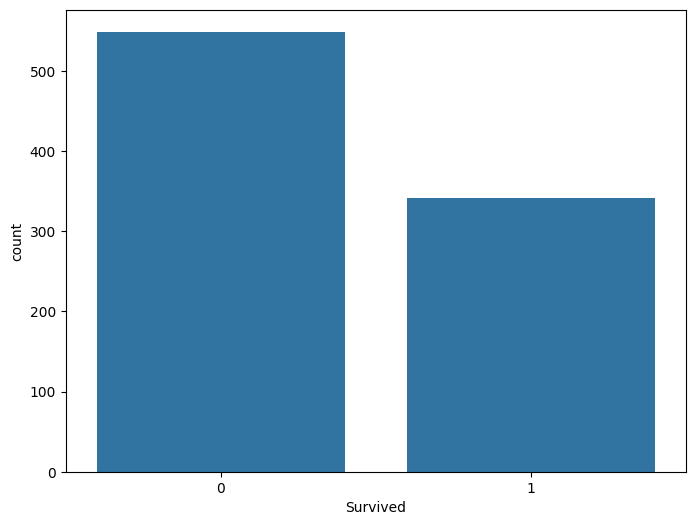

In [15]:
# Visualize the distribution of the 'Survived' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic_dataframe)

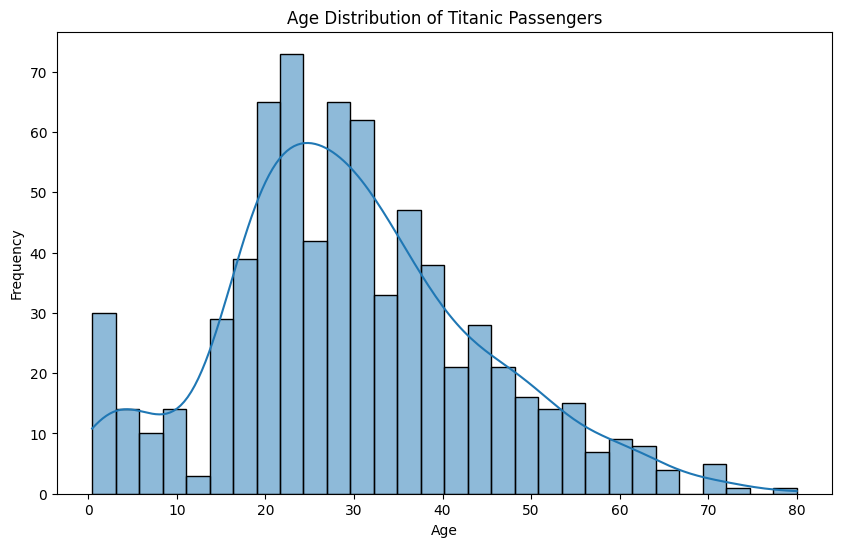

In [16]:
# Visualize the distribution of the age column
plt.figure(figsize=(10, 6))
sns.histplot(titanic_dataframe['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

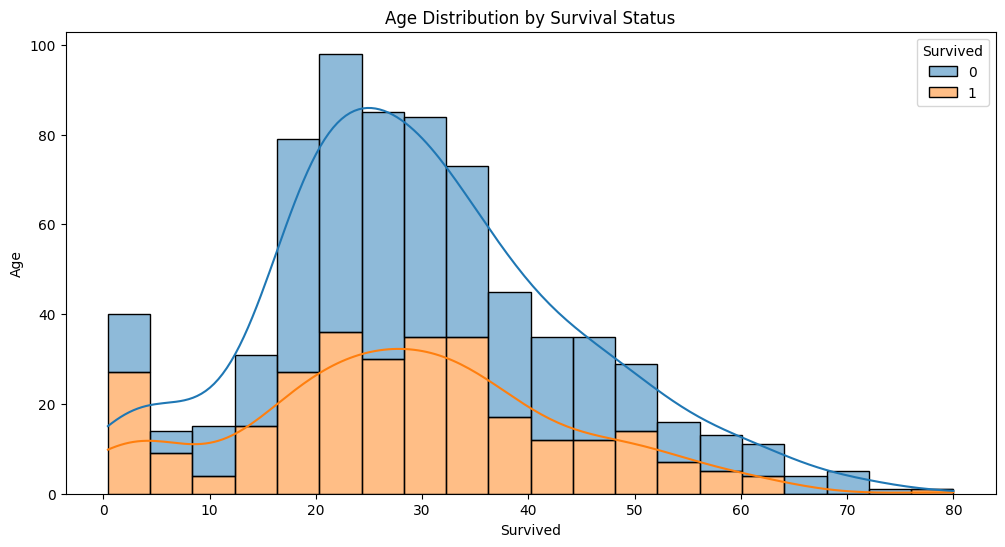

In [19]:
# Visualize the Age vs Survived relationship
plt.figure(figsize=(12, 6))
sns.histplot(data=titanic_dataframe, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [22]:
# Grouping by Pclass and calculating survival rate
titanic_dataframe.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

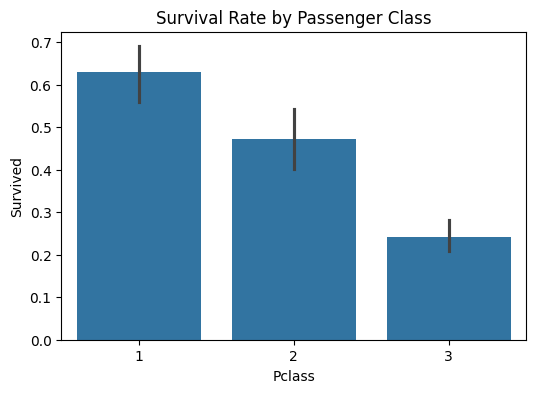

In [23]:
# 📊 Visualization: Survival Rate by Class
plt.figure(figsize=(6,4))
sns.barplot(data=titanic_dataframe, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [24]:
titanic_dataframe.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Family_Size      int64
dtype: object

In [25]:
# find the number of missing values in each column
titanic_dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_Size      0
dtype: int64

In [27]:
# fill missing values in 'Age' with the median
titanic_dataframe['Age'].fillna(titanic_dataframe['Age'].median(), inplace=True)
# fill missing values in 'Embarked' with the mode
titanic_dataframe['Embarked'].fillna(titanic_dataframe['Embarked'].mode()[0], inplace=True)
# drop 'Cabin' column as it has too many missing values
titanic_dataframe.drop(columns=['Cabin'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_31248\187570376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataframe['Age'].fillna(titanic_dataframe['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_31248\187570376.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [28]:
titanic_dataframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

In [29]:
# Rename 'Sex' to 'Gender'
titanic_dataframe.rename(columns={'Sex': 'Gender'}, inplace=True)

In [30]:
titanic_dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size'],
      dtype='object')

In [ ]:
# add a new dataframe with the columns
extra_passenger = pd.DataFrame({
    'PassengerId': [1000],
    'Survived': [0],
    'Pclass': [3],
    'Name': ['Test Passenger'],
    'Gender': ['male'],
    'Age': [25],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25]
})

# append the new passenger to the original dataframe
titanic_dataframe = pd.concat([titanic_dataframe, extra_passenger], ignore_index=True)
titanic_dataframe.tail()